In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    read_csv_from_web,
    implementChannelWidthLimit,
    implementPairDecayLimit,
    fromHB5Table1,
    readHEPDataCsv,
)
from Higgs import bounds as HB
from Higgs import predictions as HP
from Higgs import Predictions

import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
import MassResolutions as resolution


# ATLAS 13 TeV

## `gg -> H -> a a -> mu mu mu mu` [2110.00313](https://arxiv.org/abs/2110.00313)

/var/folders/xq/wd9rlffj2c7btcpmfsvqpr4c0000gn/T/ipykernel_2454/3570239028.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mDaughter1'][18] = 14.9999999


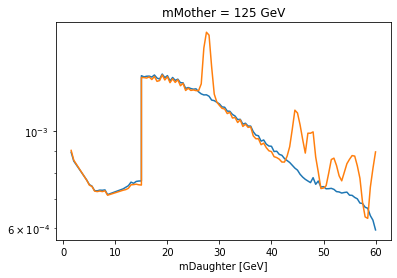

Looks good. Saving this to ggH_LHC13_ATLAS_139.json


In [7]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1954278/%24gg%20%5Cto%20H%5Cto%20aa%20%5Cto%204%5Cmu%24%20limits/1/csv"
)

df = dfs[0].rename(columns={"$m_X$ [GeV]": "mDaughter1", "Observed": "obs"})
df['exp'] = dfs[1]['Expected (1 sigma errors)']
df['mMother']=125
df['mDaughter1'][18] = 14.9999999
df['exp'] *= 10e-3
df['obs'] *= 10e-3
limitFile = implementPairDecayLimit(
    "1954278",
    {
        "production": ["ggH"],
        "firstDecay": ["mumu"],
        "secondDecay": ["mumu"],
    },
    "Fig. 14(b)",
    df,
    massResolution={
        "firstDaughter": resolution.mumu["light"], 
        "secondDaughter": resolution.mumu["light"],
        "mother": {"absolute": 10, "relative": 0},
    },
    constraints={
        "firstDaughter":[
            {"CPValue":"odd"}
        ],
    },
    idSuffix=1,
)
lim = HB.Limit(limitFile)

